In [157]:
#importing libraries
import pandas as pd #Data Processing
import numpy as np
import collections

#Visual Analysis
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit #Splitting the dataset
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, classification_report, confusion_matrix, precision_recall_curve, auc
from imblearn.over_sampling import ADASYN #Adaptive Synthetic Oversampling
from collections import Counter

In [158]:
#Reading csv file in a dataframe
customer_data= pd.read_csv("attributes_report.csv")
customer_data.head()

,company,company_type,subscribed_after_free_trial
0,346782,uk_limited_company,False
1,346783,uk_limited_company,False
2,346784,uk_limited_company,True
3,346785,uk_limited_company,False
4,346786,uk_limited_company,False


# Dataset Analysis

In [159]:
#Dmensionality of the data
customer_data.shape

(950, 3)

The dataset contains 950 instances and 3 features including the target feature.

In [160]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 3 columns):
company                        950 non-null int64
company_type                   950 non-null object
subscribed_after_free_trial    950 non-null bool
dtypes: bool(1), int64(1), object(1)
memory usage: 15.8+ KB


This shows there are 950 instances and 3 attributes including the target attribute (subscribed_after_free_trial).

In [161]:
#Sum of missing cells for each attribute
customer_data.isnull().sum()

company                        0
company_type                   0
subscribed_after_free_trial    0
dtype: int64

This shows that there is no missing data.

In [162]:
#Number of distinct categories or classes in the target attribute
customer_data['subscribed_after_free_trial'].nunique()

2

In [163]:
#number of instances per class
customer_data.subscribed_after_free_trial.value_counts()

False    789
True     161
Name: subscribed_after_free_trial, dtype: int64

This shows a complete imbalance in the dataset with 'False' being the majority class (789 instances) and, 'True' the minority class (161 instances).

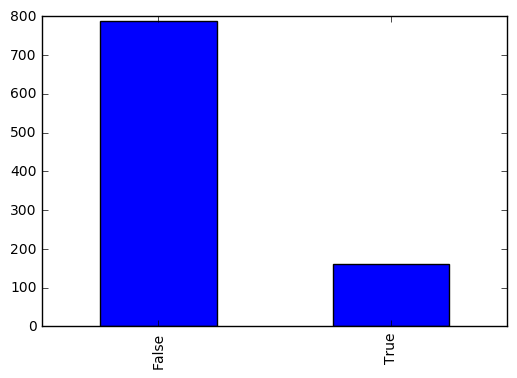

In [164]:
#visual representation of instances per class
customer_data.subscribed_after_free_trial.value_counts().plot.bar()

# Data Processing

In [165]:
log_df = pd.DataFrame(columns=['company','number_of_visits'])
print(log_df)

Empty DataFrame
Columns: [company, number_of_visits]
Index: []


In [166]:
#calculate the total number of logins for each customer in the first week
log_data = open('engagement_report.log', 'r').readlines()

i=0
log_dict={}
while(i<=6649):
    visits_list=[]
    if(i<6644):
        for j in range (i,i+7):
            log_list= log_data[j].split(' ')
            visits_list.append(int(log_list[4]))
        log_dict[int(log_list[1])] = sum(visits_list)
        i+=7
        continue
    else:
        log_last_customer=log_data[i:]
        for j in log_last_customer:
            log_list= j.split(' ')
            visits_list.append(int(log_list[4]))
        log_dict[int(log_list[1])] = sum(visits_list)
        break
#print(log_dict)

{346782: 3, 346783: 0, 346784: 7, 346785: 0, 346786: 0, 346787: 1, 346788: 0, 346789: 0, 346790: 0, 346791: 2, 346792: 7, 346793: 0, 346794: 1, 346795: 2, 346796: 11, 346797: 2, 346798: 1, 346799: 2, 346800: 1, 346801: 1, 346802: 2, 346803: 6, 346804: 0, 346805: 5, 346806: 1, 346807: 2, 346808: 4, 346809: 0, 346810: 1, 346811: 0, 346812: 2, 346813: 0, 346814: 1, 346815: 1, 346816: 9, 346817: 4, 346818: 2, 346819: 11, 346820: 2, 346821: 4, 346822: 3, 346823: 1, 346824: 1, 346825: 1, 346826: 2, 346827: 11, 346828: 2, 346829: 1, 346830: 2, 346831: 0, 346832: 2, 346833: 1, 346834: 12, 346835: 1, 346836: 2, 346837: 3, 346838: 0, 346839: 1, 346840: 1, 346841: 1, 346842: 1, 346843: 3, 346844: 1, 346845: 3, 346846: 0, 346847: 10, 346848: 7, 346849: 2, 346850: 2, 346851: 1, 346852: 3, 346853: 1, 346854: 8, 346855: 2, 346856: 1, 346857: 12, 346858: 13, 346859: 7, 346860: 1, 346861: 6, 346862: 2, 346863: 1, 346864: 2, 346865: 2, 346866: 2, 346867: 12, 346868: 0, 346869: 0, 346870: 7, 346871: 1, 3

In [46]:
log_dict = collections.OrderedDict(sorted(log_dict.items()))
print(log_dict)

OrderedDict([(346782, 3), (346783, 0), (346784, 7), (346785, 0), (346786, 0), (346787, 1), (346788, 0), (346789, 0), (346790, 0), (346791, 2), (346792, 7), (346793, 0), (346794, 1), (346795, 2), (346796, 11), (346797, 2), (346798, 1), (346799, 2), (346800, 1), (346801, 1), (346802, 2), (346803, 6), (346804, 0), (346805, 5), (346806, 1), (346807, 2), (346808, 4), (346809, 0), (346810, 1), (346811, 0), (346812, 2), (346813, 0), (346814, 1), (346815, 1), (346816, 9), (346817, 4), (346818, 2), (346819, 11), (346820, 2), (346821, 4), (346822, 3), (346823, 1), (346824, 1), (346825, 1), (346826, 2), (346827, 11), (346828, 2), (346829, 1), (346830, 2), (346831, 0), (346832, 2), (346833, 1), (346834, 12), (346835, 1), (346836, 2), (346837, 3), (346838, 0), (346839, 1), (346840, 1), (346841, 1), (346842, 1), (346843, 3), (346844, 1), (346845, 3), (346846, 0), (346847, 10), (346848, 7), (346849, 2), (346850, 2), (346851, 1), (346852, 3), (346853, 1), (346854, 8), (346855, 2), (346856, 1), (346857

In [167]:
log_df= pd.DataFrame(list(log_dict.items()), columns=['company','number_of_visits'])
log_df.head()

,company,number_of_visits
0,346782,3
1,346783,0
2,346784,7
3,346785,0
4,346786,0


In [168]:
X = customer_data.drop('subscribed_after_free_trial', axis=1)
Y = customer_data['subscribed_after_free_trial']

In [169]:
print(X.head())
print(Y.head())

   company        company_type
0   346782  uk_limited_company
1   346783  uk_limited_company
2   346784  uk_limited_company
3   346785  uk_limited_company
4   346786  uk_limited_company
0    False
1    False
2     True
3    False
4    False
Name: subscribed_after_free_trial, dtype: bool


In [170]:
print(type(Y))

<class 'pandas.core.series.Series'>


In [171]:
Y=pd.DataFrame(Y)

In [181]:
#merging the dataframes
customer_log_df = pd.merge(X, log_df, on='company')
customer_log_df.head()

,company,company_type,number_of_visits
0,346782,uk_limited_company,3
1,346783,uk_limited_company,0
2,346784,uk_limited_company,7
3,346785,uk_limited_company,0
4,346786,uk_limited_company,0


In [182]:
customer_log_df.shape

(950, 3)

In [183]:
#merging the target back
customer_log_df = pd.merge(customer_log_df, Y, how='inner', left_index=True, right_index=True)
customer_log_df.head()

,company,company_type,number_of_visits,subscribed_after_free_trial
0,346782,uk_limited_company,3,False
1,346783,uk_limited_company,0,False
2,346784,uk_limited_company,7,True
3,346785,uk_limited_company,0,False
4,346786,uk_limited_company,0,False


In [184]:
customer_log_df.shape

(950, 4)

Now, there are 950 instances and 4 features including the target feature.

# Feature Engineering

There are 2 nominal categorical attributes ('company_type' and 'subscribed_after_free_trial') which need to be converted into numerical format in order to implement the ML algorithms.

In [176]:
#Label Encoder
#converting the 'subscribed_after_free_trial' attribute into 0s and 1s.
Class= customer_log_df['subscribed_after_free_trial'].astype('category').cat.codes

In [71]:
#Here '0' means 'False',i.e., 'Not Subscribed'  and '1' means True, i.e. 'Subscribed'
print(Class)

0      0
1      0
2      1
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     1
11     0
12     0
13     0
14     1
15     0
16     0
17     0
18     0
19     0
20     0
21     1
22     0
23     1
24     0
25     0
26     0
27     0
28     0
29     0
      ..
920    0
921    0
922    0
923    0
924    0
925    0
926    0
927    0
928    0
929    0
930    0
931    0
932    0
933    0
934    1
935    0
936    0
937    0
938    0
939    0
940    0
941    0
942    0
943    0
944    0
945    0
946    1
947    0
948    0
949    0
dtype: int8


In [177]:
#Transforming categorical attribute 'company_type'
customer_log_df.company_type.value_counts()

uk_limited_company    500
uk_sole_trader        350
universal_company     100
Name: company_type, dtype: int64

Thus, we have 3 distinct values for the attribute 'company_type'. So, each category can be encoded into a numeric value.

In [185]:
#one-hot encoding
customer_log_df = pd.concat([customer_log_df,pd.get_dummies(customer_log_df['company_type'], prefix='company_type')],axis=1)
customer_log_df.head()

,company,company_type,number_of_visits,subscribed_after_free_trial,company_type_uk_limited_company,company_type_uk_sole_trader,company_type_universal_company
0,346782,uk_limited_company,3,False,1.0,0.0,0.0
1,346783,uk_limited_company,0,False,1.0,0.0,0.0
2,346784,uk_limited_company,7,True,1.0,0.0,0.0
3,346785,uk_limited_company,0,False,1.0,0.0,0.0
4,346786,uk_limited_company,0,False,1.0,0.0,0.0


In [186]:
#drop original categorical columns
customer_log_df.drop("company_type", axis = 1, inplace=True)
customer_log_df.drop("subscribed_after_free_trial", axis = 1, inplace=True)
customer_log_df.head()

,company,number_of_visits,company_type_uk_limited_company,company_type_uk_sole_trader,company_type_universal_company
0,346782,3,1.0,0.0,0.0
1,346783,0,1.0,0.0,0.0
2,346784,7,1.0,0.0,0.0
3,346785,0,1.0,0.0,0.0
4,346786,0,1.0,0.0,0.0


In [187]:
#customer_log_df.insert(1, 'company_type', company_type_encoded)
customer_log_df.insert(5, 'subscribed', Class)
customer_log_df.head()

,company,number_of_visits,company_type_uk_limited_company,company_type_uk_sole_trader,company_type_universal_company,subscribed
0,346782,3,1.0,0.0,0.0,0
1,346783,0,1.0,0.0,0.0,0
2,346784,7,1.0,0.0,0.0,1
3,346785,0,1.0,0.0,0.0,0
4,346786,0,1.0,0.0,0.0,0


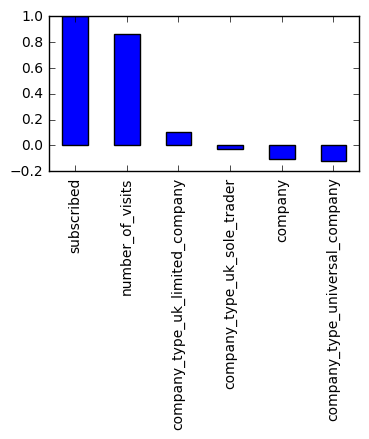

In [188]:
#Get Correlation of "subscribed" feature with other features
plt.figure(figsize=(4,2))
customer_log_df.corr()['subscribed'].sort_values(ascending = False).plot(kind='bar')

It can be seen that the number of visits to the system in the first week is highly correlated.

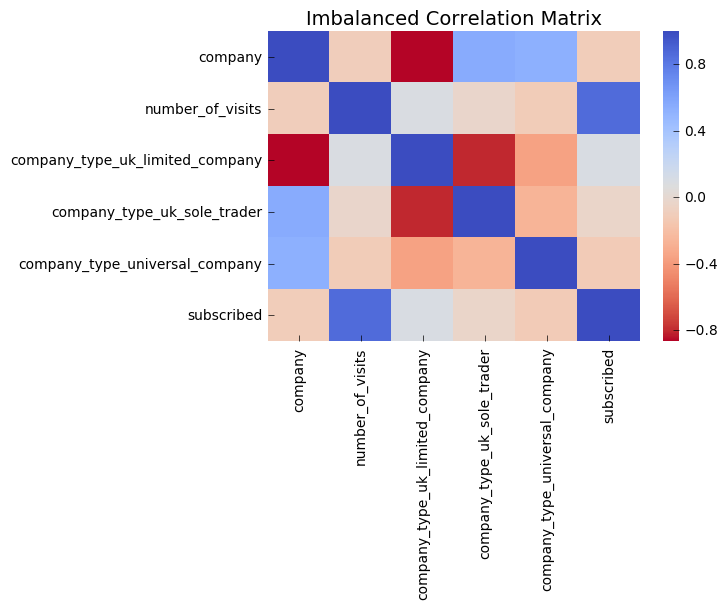

In [189]:
#checking correlation between features and the likelihood of the customer to subscribe
f, ax1 = plt.subplots(figsize=(6,4))

corr = customer_log_df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix", fontsize=14)

With respect to the predictable feature (Subscribed), the number of visits show high positive correlation.
The company type uk_limited and uk_sole trader are highly correlated with respect to each other.

In [190]:
#checking the percentage of each class in the dataset
(customer_log_df.subscribed.value_counts())/(customer_log_df.subscribed.count())

0    0.830526
1    0.169474
Name: subscribed, dtype: float64

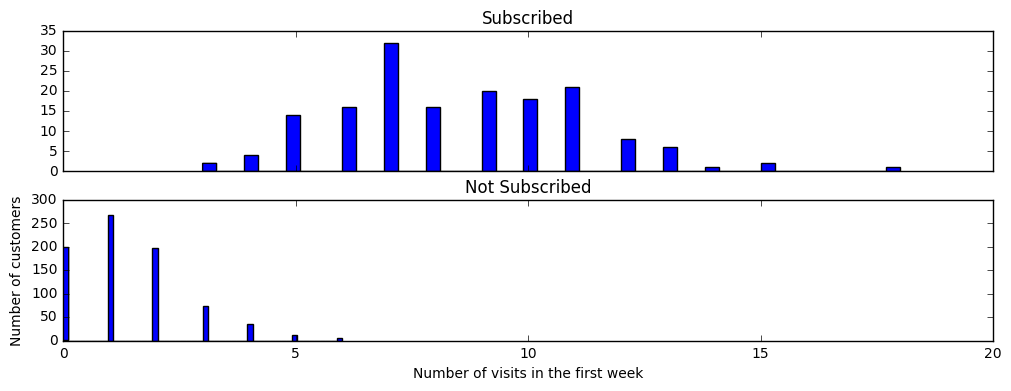

In [191]:
#Histrogram for feature number_of_visits
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

ax1.hist(customer_log_df["number_of_visits"][customer_log_df["subscribed"] == 1], bins = 50)
ax1.set_title('Subscribed')

ax2.hist(customer_log_df["number_of_visits"][customer_log_df["subscribed"] == 0], bins = 50)
ax2.set_title('Not Subscribed')

plt.xlabel('Number of visits in the first week')
plt.ylabel('Number of customers')
plt.show()

It can be seen above that the customers that are likely to subscribe visit more during there free trial month as compared to the customers that donot subscribe. Maximum number of customers that are likely to subscribe use the system 7 times in the first week compared to only 1 time by those that donot subscribe. Customers that visit the system less that 5 times in the first week are most likely to not subscribe where as the customers to visit the system more than 5 times are quite likely to subscribe.

In [192]:
#Descriptive statistics for number_of_visits of subscribed customers
print("Customers Subscribed")
customer_log_df['number_of_visits'][customer_log_df['subscribed']==1]. describe()

Customers Subscribed


count    161.000000
mean       8.490683
std        2.610359
min        3.000000
25%        7.000000
50%        8.000000
75%       10.000000
max       18.000000
Name: number_of_visits, dtype: float64

As observed, the average number of visits for customer subscribing are approximately 8. The maximum and minimum number of visits being 18 and 3 respectively.

In [193]:
#Descriptive statistics for number_of_visits of customers that did not subscribed
print("Customers Not Subscribed")
customer_log_df['number_of_visits'][customer_log_df['subscribed']==0]. describe()

Customers Not Subscribed


count    789.000000
mean       1.415716
std        1.235908
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        6.000000
Name: number_of_visits, dtype: float64

As observed, the average number of visits for customers not subscribing is approximately 1. The maximum and minimum number of visits being 6 and 0 respectively.

In [194]:
#dropping feature 'company' as it is just a unique identifier which does not give any information regarding the possibility of a customer purchasing a subscription or not
customer_log_df.drop("company", axis = 1, inplace=True)
customer_log_df.head()

,number_of_visits,company_type_uk_limited_company,company_type_uk_sole_trader,company_type_universal_company,subscribed
0,3,1.0,0.0,0.0,0
1,0,1.0,0.0,0.0,0
2,7,1.0,0.0,0.0,1
3,0,1.0,0.0,0.0,0
4,0,1.0,0.0,0.0,0


In [195]:
#Variance
customer_log_df.var()

number_of_visits                   9.469962
company_type_uk_limited_company    0.249570
company_type_uk_sole_trader        0.232932
company_type_universal_company     0.094282
subscribed                         0.140901
dtype: float64

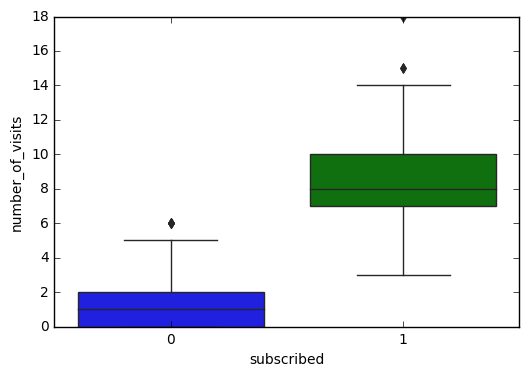

In [196]:
#Boxplot for the number_of_visits feature, in order to visualize the outliers.
sns.boxplot(x=customer_log_df['subscribed'], y=customer_log_df['number_of_visits'])

There are outliers present in both the categories. Outliers can be removed at a later stage in order to compare the performance of the model.

Since, the data is unbalanced. Therefore, it should be balanced. But before oversampling the data is split into train and test set.

In [197]:
#Splitting data before sampling
#Splitting data into train and test set in 80% and 20% respectively, using Stratified Shuffle Split

X = customer_log_df.drop('subscribed', axis=1)
Y = customer_log_df['subscribed']

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

for train_index, test_index in sss.split(X, Y):
    print("Train:", train_index, "Test:", test_index)
    Xtrain, Xtest = X.iloc[train_index], X.iloc[test_index]
    Ytrain, Ytest = Y.iloc[train_index], Y.iloc[test_index]

Train: [847 735 276 562 828 621  47 586 640 389 844 846 933 905 756 254 928 226
 593 177 347  58 278 809   8  88 517 419 721 908 318 661 395 713 164  13
 323 184  53  39  44 188 560 285 659 547 146 414 895 854 660 887 912 124
 719 160  89 845 565 338 874 144 508 284 507  54 598 654 315 631 679   7
 463 269 445 475 899 620 154 244 577 741 528 607 929 456 563 203 680  80
 616 339  71 824 190 885  22 550 605 636 918 249 670  98 350 237 949  69
 864 868 136 351 903 252 345  91 770 332 440  21 877 886 781 326 106 457
 461 825 436 645 597 427 625 683 915 521 867 524 368 566  86 295 359 352
 536 491 802 397 271 453  83 117 375 437 186 766 197 862  61 787 109 932
 218 110 422 690 765  29 599 446 464 816 549 292 170 525 738 143 805 442
 405 783 479 644 714 726 622 727 510 592 407 642 736 118 119 725 441 317
 305 673 155 334 691 452 374  95 370 229  82 637 503 353 438 366 157 387
 256 779 319 166 348 750  34 294 181 527  67 925 515 404 920 651 658 223
 281 695 757 777  76 268 228 628 173 336 472

In [198]:
print(Xtrain.shape)
print(Ytrain.shape)
print(Xtest.shape)
print(Ytest.shape)

(760, 4)
(760,)
(190, 4)
(190,)


In [199]:
# Check if the labels are distributed equally in all the datasets after splitting
train_unique_label, train_counts_label = np.unique(Ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(Ytest, return_counts=True)

print('Label Distributions: \n')
print(train_counts_label/ len(Ytrain))
print(test_counts_label/ len(Ytest))

Label Distributions: 

[0.83026316 0.16973684]
[0.83157895 0.16842105]


As seen above, the labels are equally distributed in both train and test set.

In [200]:
#Using ADASYN for Oversampling
ada = ADASYN(sampling_strategy='minority', random_state=42)

#Oversampling is applied only on the training set
X_adasampled, Y_adasampled = ada.fit_sample(Xtrain, Ytrain)
print('Original dataset shape %s' % Counter(Ytrain))
print('Resampled dataset shape %s' % Counter(Y_adasampled))
print('Shape of X_adasampled: {}'.format(X_adasampled.shape))
print('Shape of Y_adasampled: {}'.format(Y_adasampled.shape))

Original dataset shape Counter({0: 631, 1: 129})
Resampled dataset shape Counter({0: 631, 1: 626})
Shape of X_adasampled: (1257, 4)
Shape of Y_adasampled: (1257,)


In [201]:
Xtest_arr=Xtest.values
Ytest_arr=Ytest.values

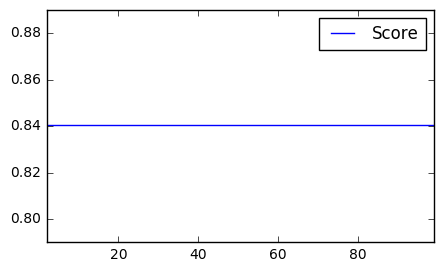

In [202]:
#Parameter Tuning Random Forest Classifier
pred_scores_RF = []
for i in range(2,100):
    #n_estimators is the number of tress in the forest
    rfc = RandomForestClassifier(n_estimators=i, random_state=111)
    rfc.fit(X_adasampled, Y_adasampled)
    Y_pred = rfc.predict(Xtest)
    pred_scores_RF.append((i, [f1_score(Ytest_arr,Y_pred)]))
df = pd.DataFrame.from_items(pred_scores_RF,orient='index', columns=['Score'])
df.plot(figsize=(5,3))

Thus, the F-score is the same for the entire range of n_iter values. Thus, the lowest value is chosen from the range, i.e., 2. Similarly, other parameters can also be tuned using Grid Search CV.

In [203]:
#function for confusion matrix
def conf_matrix(predicted_values):
    Predictions_CM = confusion_matrix(Ytest_arr, predicted_values, labels = [0, 1])
    class_feat=customer_log_df['subscribed'].copy()
    class_feat= class_feat.unique()
    fig, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(Predictions_CM, annot=True, fmt='d', xticklabels=class_feat, yticklabels=class_feat)
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.show()

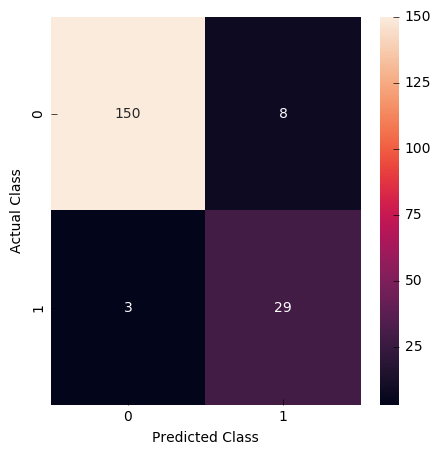

In [204]:
rfc = RandomForestClassifier(n_estimators=2, random_state=111)
rfc.fit(X_adasampled, Y_adasampled)
Y_pred = rfc.predict(Xtest)
conf_matrix(Y_pred)

In [205]:
print(classification_report(Ytest,Y_pred,labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       158
           1       0.78      0.91      0.84        32

   micro avg       0.94      0.94      0.94       190
   macro avg       0.88      0.93      0.90       190
weighted avg       0.95      0.94      0.94       190



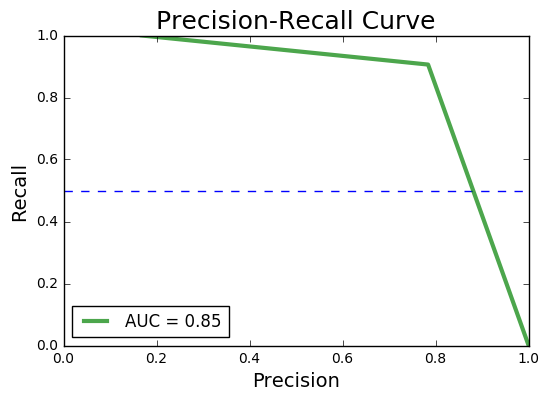

In [206]:
#Calculating Precision and Recall for various thresholds
precision, recall, thresholds_pr = precision_recall_curve(Ytest_arr, Y_pred)

#Auc for PR curve
AUC_PRcurve= auc(recall, precision)

plt.figure(1)
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
#plot PR curve
plt.plot(precision, recall, label = "AUC = {:0.2f}".format(AUC_PRcurve), lw = 3, alpha = 0.7)
plt.xlabel('Precision', fontsize = 14)
plt.ylabel('Recall', fontsize = 14)
plt.title('Precision-Recall Curve', fontsize = 18)
plt.legend(loc='best')
plt.show()

             Gamma     Score
rbf           0.05  0.821918
rbf           0.10  0.821918
rbf           0.15  0.821918
rbf           0.20  0.821918
polynominal   0.05  0.821918


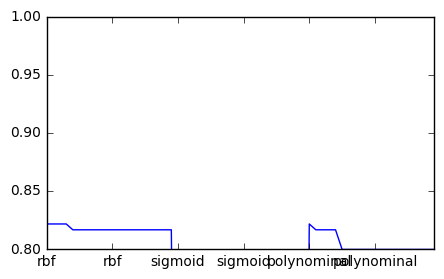

In [207]:
#SVM Classifier
pred_scores_SVM = []
krnl = {'rbf' : 'rbf','polynominal' : 'poly', 'sigmoid': 'sigmoid'}
for k,v in krnl.items():
    for i in np.linspace(0.05, 1, num=20):
        svc = SVC(kernel=v, gamma=i)
        svc.fit(X_adasampled, Y_adasampled)
        Y_pred = svc.predict(Xtest)
        pred_scores_SVM.append((k, [i, f1_score(Ytest_arr,Y_pred)]))
        
#converts key-value pair to dataframe    
df = pd.DataFrame.from_items(pred_scores_SVM,orient='index', columns=['Gamma','Score'])
df['Score'].plot(kind='line', figsize=(5,3), ylim=(0.8,1.0))
        
print(df[df['Score'] == df['Score'].max()])

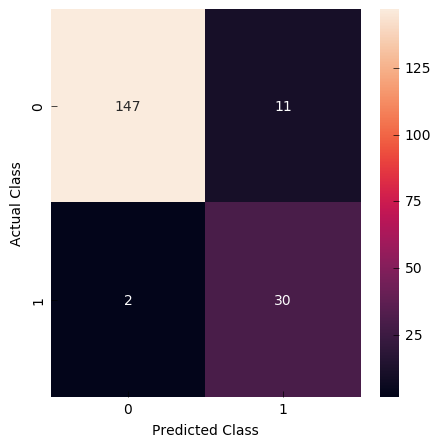

In [208]:
svc = SVC(kernel='rbf', gamma=0.05)
svc.fit(X_adasampled, Y_adasampled)
Y_pred = svc.predict(Xtest)
conf_matrix(Y_pred)

In [209]:
print(classification_report(Ytest,Y_pred,labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       158
           1       0.73      0.94      0.82        32

   micro avg       0.93      0.93      0.93       190
   macro avg       0.86      0.93      0.89       190
weighted avg       0.94      0.93      0.93       190



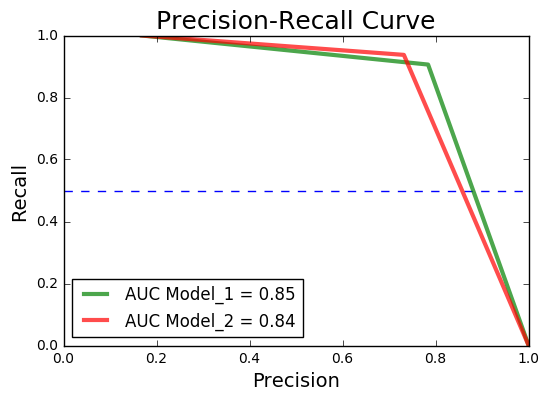

In [210]:
#Calculating Precision and Recall for various thresholds
precision_2, recall_2, thresholds_pr_2 = precision_recall_curve(Ytest_arr, Y_pred)

#Auc for PR curve
AUC_PRcurve_2= auc(recall_2, precision_2)

plt.figure(1)
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
#plot PR curve
plt.plot(precision, recall, label = "AUC Model_1 = {:0.2f}".format(AUC_PRcurve), lw = 3, alpha = 0.7)
plt.plot(precision_2, recall_2, label = "AUC Model_2 = {:0.2f}".format(AUC_PRcurve_2), lw = 3, alpha = 0.7)
plt.xlabel('Precision', fontsize = 14)
plt.ylabel('Recall', fontsize = 14)
plt.title('Precision-Recall Curve', fontsize = 18)
plt.legend(loc='best')
plt.show()

On comparing, Random Forest and Support Vector Machine, if the subscribed category (1) is taken into consideration then, random forest performs better in terms of F-score. But the non-subscribed class (0) is of higher importance in order to determine the customers that will not subscribe and steps ca be taken to change there decision to subscribe. Taking a look at the confusion matrix it can be seen that the number of False Positives is greater in SVM. Thus, from this point random forest is better in all aspects compared to SVM.  